# Project 4: Chapter 4 - Functional Programming: Rudimentary Probability, Statistics, and Analytics

## Statistical Functions

In [1]:
import random

In [2]:
def total(lst):
    total_ = 0
    for val in lst:
        total_+= val
#     n = len(lst)
#     for i in range(n):
#         total_ += lst[i]
    return total_

X1 = [i for i in range(3,31, 3)]
X2 = [random.randint(0,10) for i in range(10)]
print("X1:",X1)
print("X2", X2)

X1: [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
X2 [10, 8, 2, 4, 6, 3, 7, 4, 9, 0]


In [3]:
total1 = total(X1)
total2 = total(X2)
print("Total of X1:",total1)
print("Total of X2:", total2)

Total of X1: 165
Total of X2: 53


In [4]:
def mean(lst):
    n = len(lst)
    mean_ = total(lst) / n
    return mean_

In [5]:
print("Mean of X1:", mean(X1))
print("Mean of X2", mean(X2))

Mean of X1: 16.5
Mean of X2 5.3


In [6]:
import numpy as np
np.mean(X1), np.mean(X2)

(16.5, 5.3)

### Median

The median is either 1) the value that appears exactly in the middle of the ordered list if the length of the list is odd or 2) the average of the two middle values that appear in the ordered list if the length of the list is even. 

In [7]:
def median(lst):
    n = len(lst)
    lst = sorted(lst)
    # the percent operator calculates the remander
    # Case 1: list is odd in length
    ## just select value from middle of list
    if n % 2 != 0:
        # coerce float to int
        middle_index = int((n - 1) / 2)
        median_ = lst[middle_index]
    # Case 2: list is even in length
    ## take the average of the middle two values
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        median_ = mean(lst[lower_middle_index : upper_middle_index + 1])
    return median_
median1 = median(X1)
median2 = median(X2)
print("Median of X1:", median1)
print("Median of X2:", median2)

Median of X1: 16.5
Median of X2: 5.0


In [8]:
def mode(lst):
    # use to record value(s)
    max_count = 0
    counter_dict = {}
    # use set if you don't want to define a value as zero multiple times
#     for value in set(lst):
    for value in lst:
        counter_dict[value] = 0
    for value in lst:
        counter_dict[value] += 1
    max_count = max(counter_dict.values())
    mode_ = [key for key in counter_dict.keys() if counter_dict[key] == max_count]
#     mode_ = [key for key, count in counter_dict.items() if count == max_count]
    
    return mode_

print("Mode of X1:", mode(X1))
print("Mode of X2:", mode(X2))

Mode of X1: [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
Mode of X2: [4]


In [9]:
def variance(lst, sample = True):
    list_mean = mean(lst)
    # use n to calculate average of sum squared diffs
    n = len(lst)
    DoF = n - 1
    sum_sq_diff = 0
    for val in lst:
        sum_sq_diff += (val - list_mean) ** 2
    # Case 1: list of values represent entire population
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    # Case 2: list of values represents only a sample (subset)
    ## of the population
    else:
        # divide by DoF for sample
        variance_ = sum_sq_diff / DoF
    return variance_

In [10]:
print("Variance of X1:", variance(X1))
print("Variance of X2:", variance(X2))

Variance of X1: 82.5
Variance of X2: 10.455555555555556


Text(0, 5.3, 'Mean(X2)')

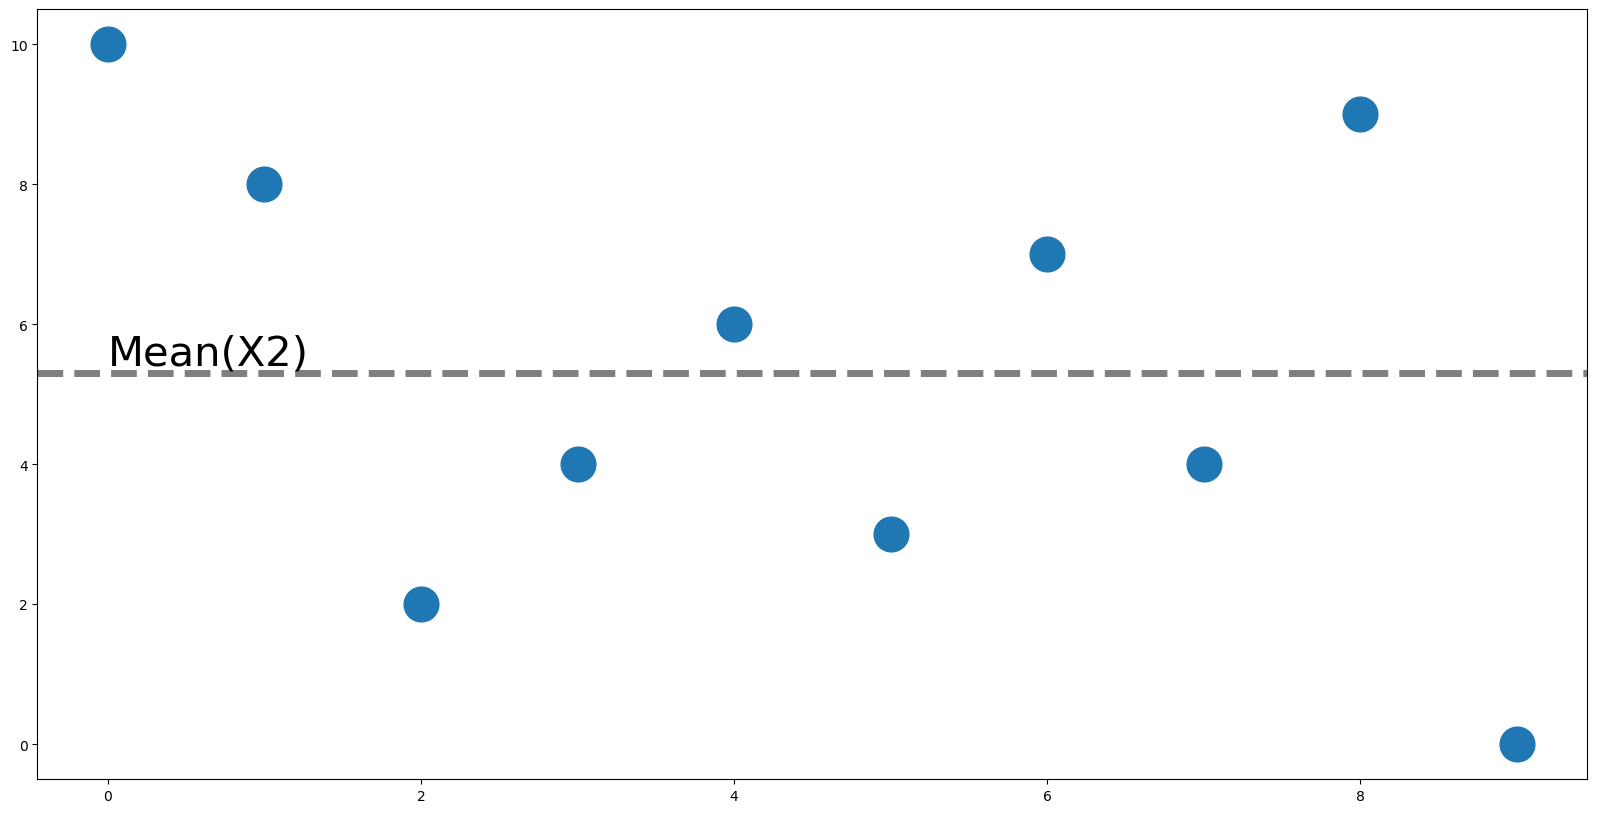

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,10))
ax.plot(X2, ls = "", marker=".", markersize=50)
ax.axhline(mean(X2), linewidth = 5, alpha = .5, ls = "--", color = "k")
ax.text(0, mean(X2), "Mean(X2)", va = "bottom", fontsize = 30)
# for x in X2:
#     ax.axvline(xmin = x, xmax = mean(X2))

In [12]:
def SD(lst, sample = True):
    # Standard deviation is the square root of variance
    SD_ = variance(lst, sample) ** (1/2)
    return SD_

print("SD of X1:", SD(X1))
print("SD of X2:", SD(X2))

SD of X1: 9.082951062292475
SD of X2: 3.2335051500740732


In [13]:
def STE(lst, sample = True):
    n = len(lst)
    se = SD(lst, sample) / n ** (1/2)
    
    return se
print("SE of X1:", STE(X1))
print("SE of X2:", STE(X2))

SE of X1: 2.872281323269014
SE of X2: 1.0225241100118645


In [14]:
np.inf, np.inf*-1

(inf, -inf)

### Covariance

$cov_{pop}(x,y) = \frac{\sum_{i=0}^{n-1}{(x_i - x_{mean})(y_i - y_{mean})}}{n}$

In [15]:
def covariance(x, y, sample = False):
    meanx = mean(x)
    meany = mean(y)
    
    cov = 0
    nx = len(x)
    ny = len(y)
    if nx == ny:
        n = nx
        for i in range(n):
            cov += (x[i] - meanx) * (y[i] - meany)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n-1)
        return cov
    else:
        print("List lengths are not equal.", nx, 
              "!=", ny)


In [16]:
covx1x2 = covariance(X1, X2, sample = True)
covx1x2

-11.166666666666666

In [17]:
covx1x2 = covariance(X1, X2[1:])
# covx1x2

List lengths are not equal. 10 != 9


### Correlation
$corr(x,y) = \frac{cov(x,y)}{\sigma_x \sigma_y}$

$corr(x,y) = \rho_{xy}$

Correlation normalizes $cov(x,y)$ ($\sigma_{xy}$) by dividing out the product of $\sigma_x$ and $\sigma_y$.

In [18]:
def correlation(x,y):
    cov = covariance(x,y)
    SDx = SD(x)
    SDy = SD(y)
    corr = cov / (SDx * SDy)
    return corr
corr_X1_X2 = correlation(X1,X2)
corr_X1_X2, corr_X1_X2 ** 2

(-0.3421885949142977, 0.11709303448942134)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [20]:
simpsons = {j: [np.random.normal() * 20 + int(i/10)\
               for i in range(1000)] for j in range(10)}
# pd.DataFrame(simpsons).tail()
print(simpsons.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [21]:
values = []
for j in simpsons.keys():
    ix_interval = j * 100
    simpsons[j] = pd.DataFrame(
        simpsons[j], 
        # shift the index (x values) to the right)
        index = np.arange(
            ix_interval,              # shift y values down
            len(simpsons[j]) + ix_interval)).sub(j*35)
    # column for x
    simpsons[j]["Index"] = simpsons[j].index
    # column for entity that defines data generating process
    simpsons[j]["Entity"] = int(j)
    values = values + list(simpsons[j].values)
stacked_simpsons = pd.DataFrame(
    values,
    columns = ["y", "x", "Entity"])
stacked_simpsons.head()

y    x  Entity
0   5.603917  0.0     0.0
1  33.205919  1.0     0.0
2 -23.985982  2.0     0.0
3  20.167505  3.0     0.0
4  23.507691  4.0     0.0

In [30]:
stacked_simpsons.corr()["x"]["y"]
# correlation(stacked_simpsons["x"],stacked_simpsons["y"])

-0.4723476584115529

In [36]:
stacked_simpsons[["Entity"]].value_counts()

Entity
0.0       1000
1.0       1000
2.0       1000
3.0       1000
4.0       1000
5.0       1000
6.0       1000
7.0       1000
8.0       1000
9.0       1000
Name: count, dtype: int64

Text(0.5, 1.0, 'Data appears to be negatively correlated\n-0.47')

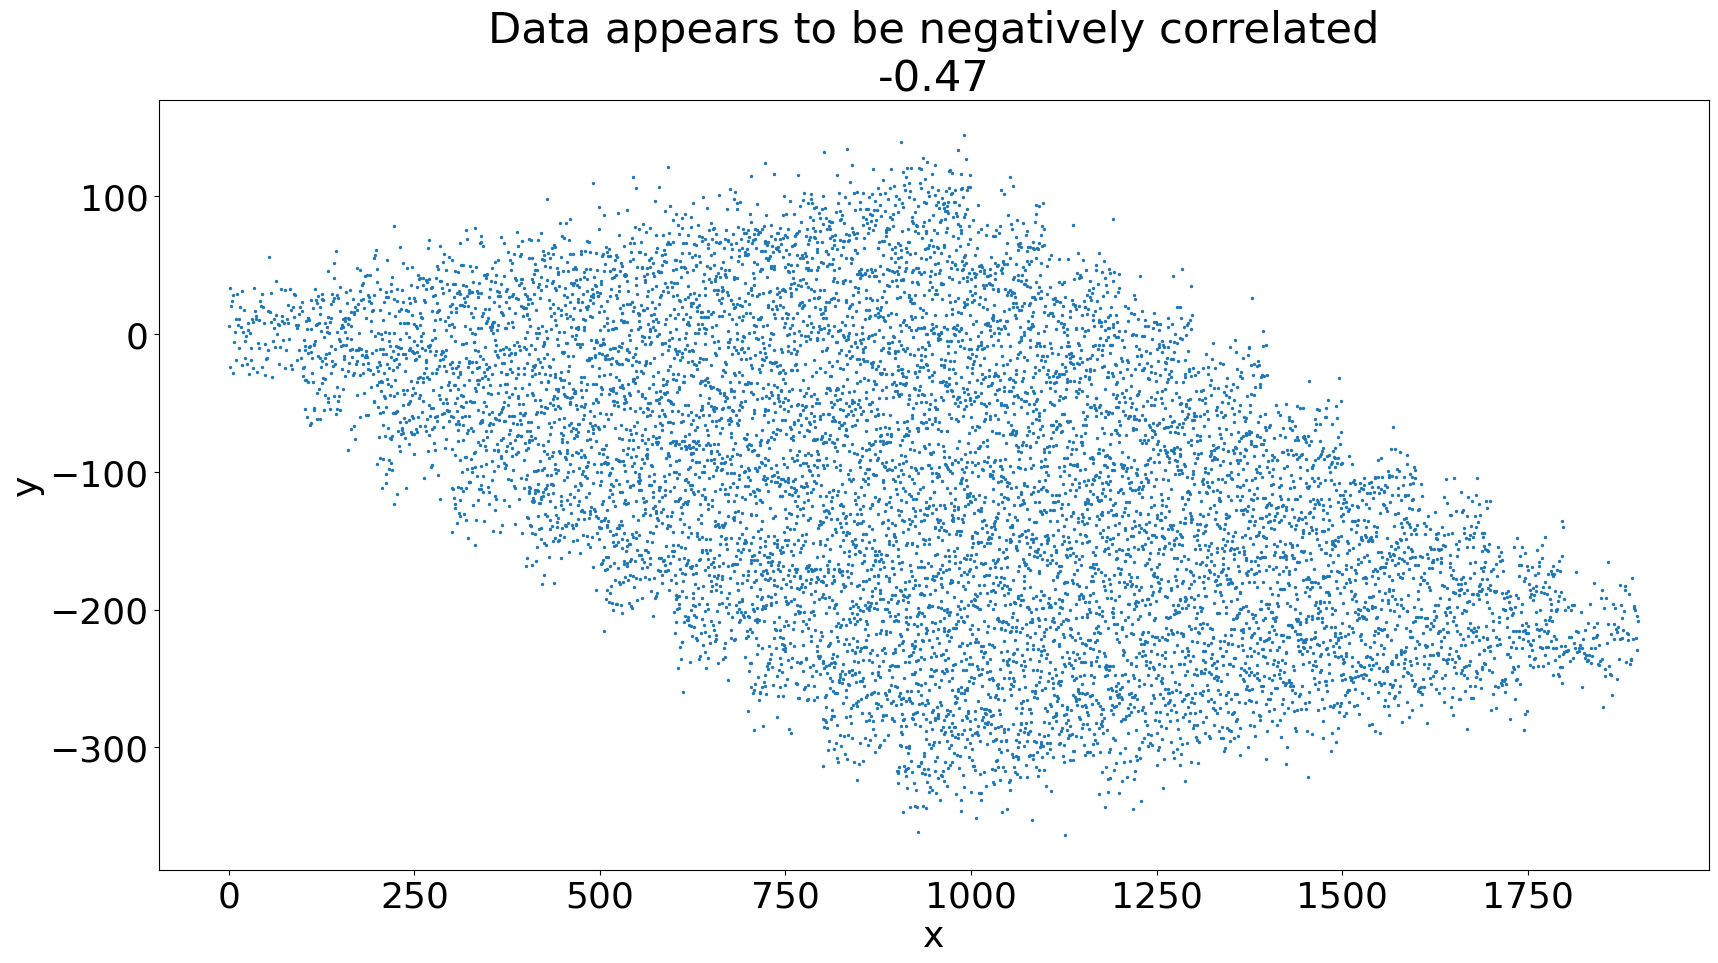

In [23]:
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (20,10))
stacked_simpsons.plot.scatter(x = "x",
                              y = "y",
                              s = 2,
                              c = "C0",
                              ax = ax)
pooled_correlation=str(round(correlation(stacked_simpsons["x"],
                                        stacked_simpsons["y"]),2))
ax.set_title(
    "Data appears to be negatively correlated\n" + pooled_correlation)


In [39]:
### !!!! Scary !!!!
corr_by_entity = stacked_simpsons.groupby("Entity").corr().round(2)
corr_by_entity[
    corr_by_entity.index.get_level_values(1) == "x"]["y"]

Entity   
0.0     x    0.82
1.0     x    0.81
2.0     x    0.82
3.0     x    0.84
4.0     x    0.81
5.0     x    0.82
6.0     x    0.83
7.0     x    0.81
8.0     x    0.83
9.0     x    0.82
Name: y, dtype: float64

Text(0.5, 1.0, 'With Group Controls Correlations is Positive')

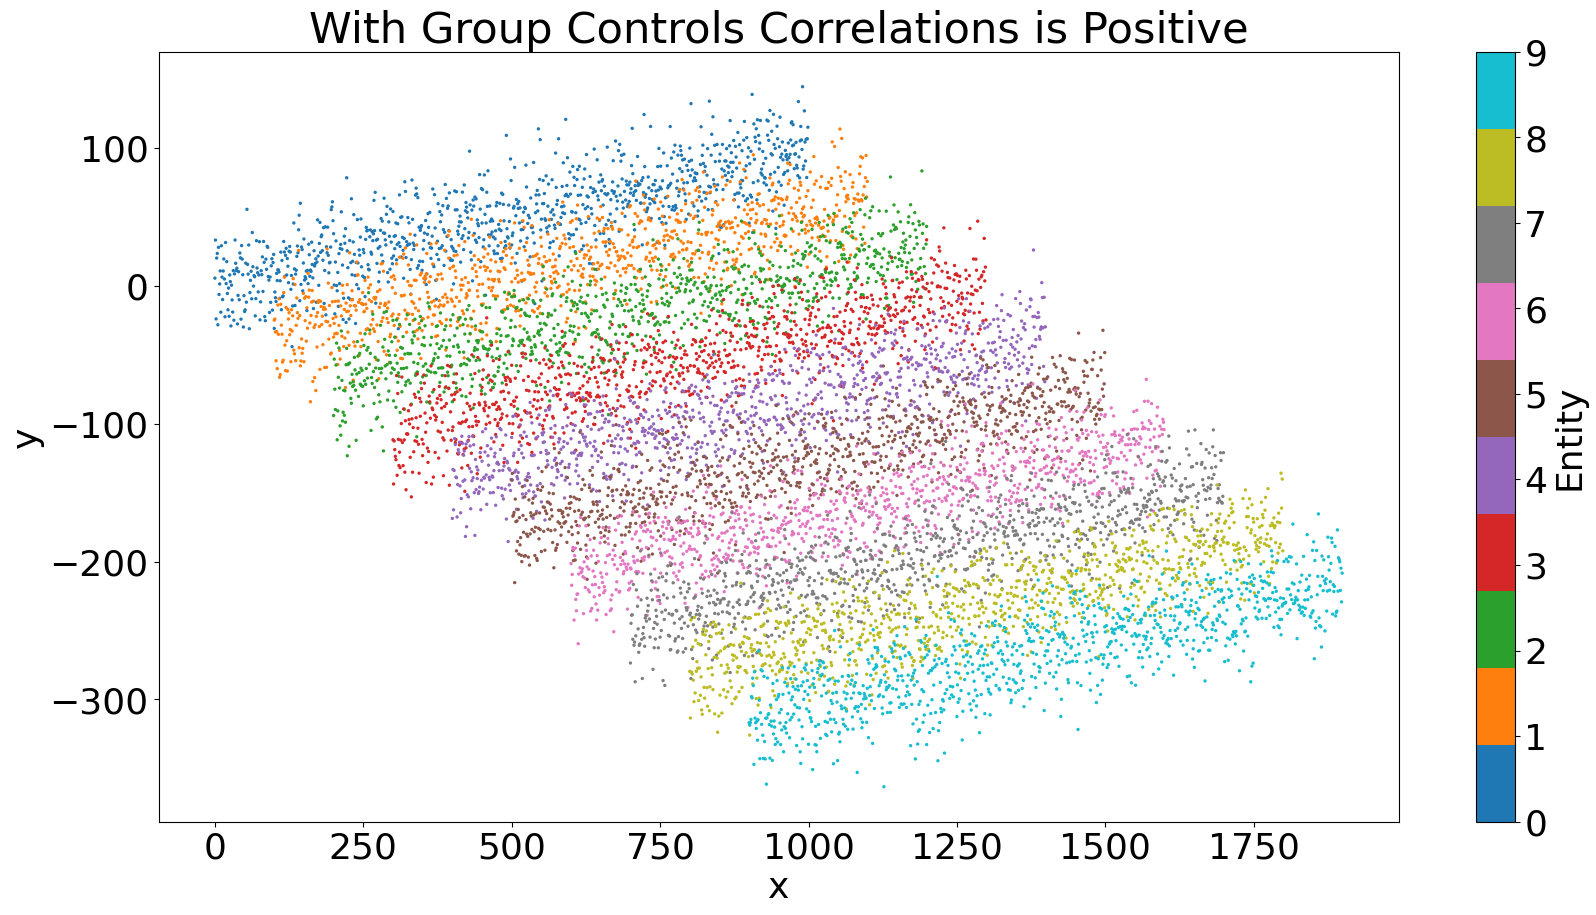

In [51]:
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(20, 10))
# cmap = cm.get_cmap('tab10')
stacked_simpsons.plot.scatter(x="x",
                              y="y",
                              s=2,
#                               alpha = .1,
                              # color by entity
                              c="Entity",
                              cmap="tab10", 
                              ax=ax)

ax.set_title("With Group Controls Correlations is Positive")


## Simpsons Paradox and Drug Trials


In [ ]:
csv_url =  "https://raw.githubusercontent.com/PacktPublishing/Causal-Inference-and-Discovery-in-Python/main/data/ch_01_drug_data.csv"
data = pd.read_csv(csv_url).set_index("Drug").T.reset_index()
for ab in ("A","B"):
    data["index"][data["index"] == ab + ".1"] = ab


In [58]:
data.rename(columns={"index":"Drug"}, inplace = True)
data#.reset_index()

Drug Drug  Clot  Female  Male  Total
0       A     1      24     3     27
1       A     0      56    39     95
2       B     1      17     6     23
3       B     0      25    74     99

In [65]:
# unstack makes columns out of a secondary index
plot_df = data.groupby(["Drug", "Clot"])["Total"].sum().unstack()

<Axes: xlabel='Drug'>

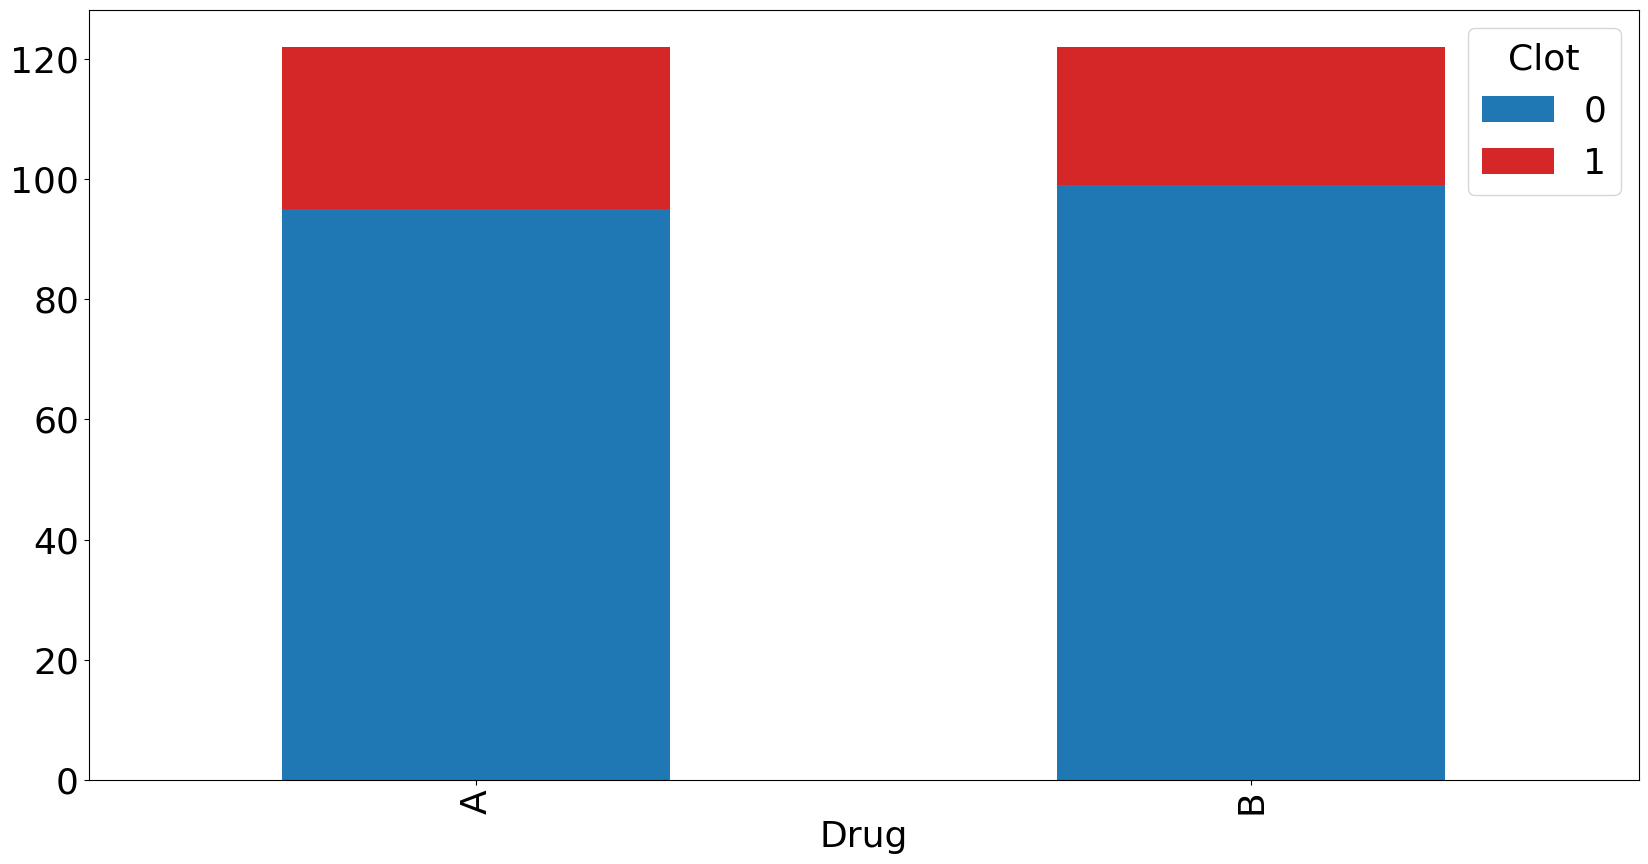

In [69]:
colors = ["C0", "C3"]
fig, ax = plt.subplots(figsize = (20,10))
plot_df.plot.bar(stacked = True, 
                 legend = True, 
                 color = colors,
                 ax = ax)

In [70]:
import plotly.graph_objects as go
fig = go.Figure()

# Adding each stack (clot type in this case) as a separate trace
for clot_type in plot_df.columns:
    fig.add_trace(go.Bar(
        x=plot_df.index,
        y=plot_df[clot_type],
        name="Clot: " + str(clot_type)
    ))

# Update layout for a stacked bar plot
fig.update_layout(
    barmode='stack',
    title='Clotting by Drug',
    xaxis_title='Drug',
    yaxis_title='Total'#,
#     legend_title='Clot Type'
)

# Show the plot
fig.show()

### Gender is not evenly distributed between trials

In [76]:
plot_df = data.groupby(["Drug", "Clot"])[["Male", "Female"]].sum().unstack().T
plot_df.index.names = ("Gender", "Clot")
# transpose so we can stack data by row in bar graph.
plot_df = plot_df.groupby("Gender").sum().T
plot_df

Gender  Female  Male
Drug                
A           80    42
B           42    80

<Axes: xlabel='Drug'>

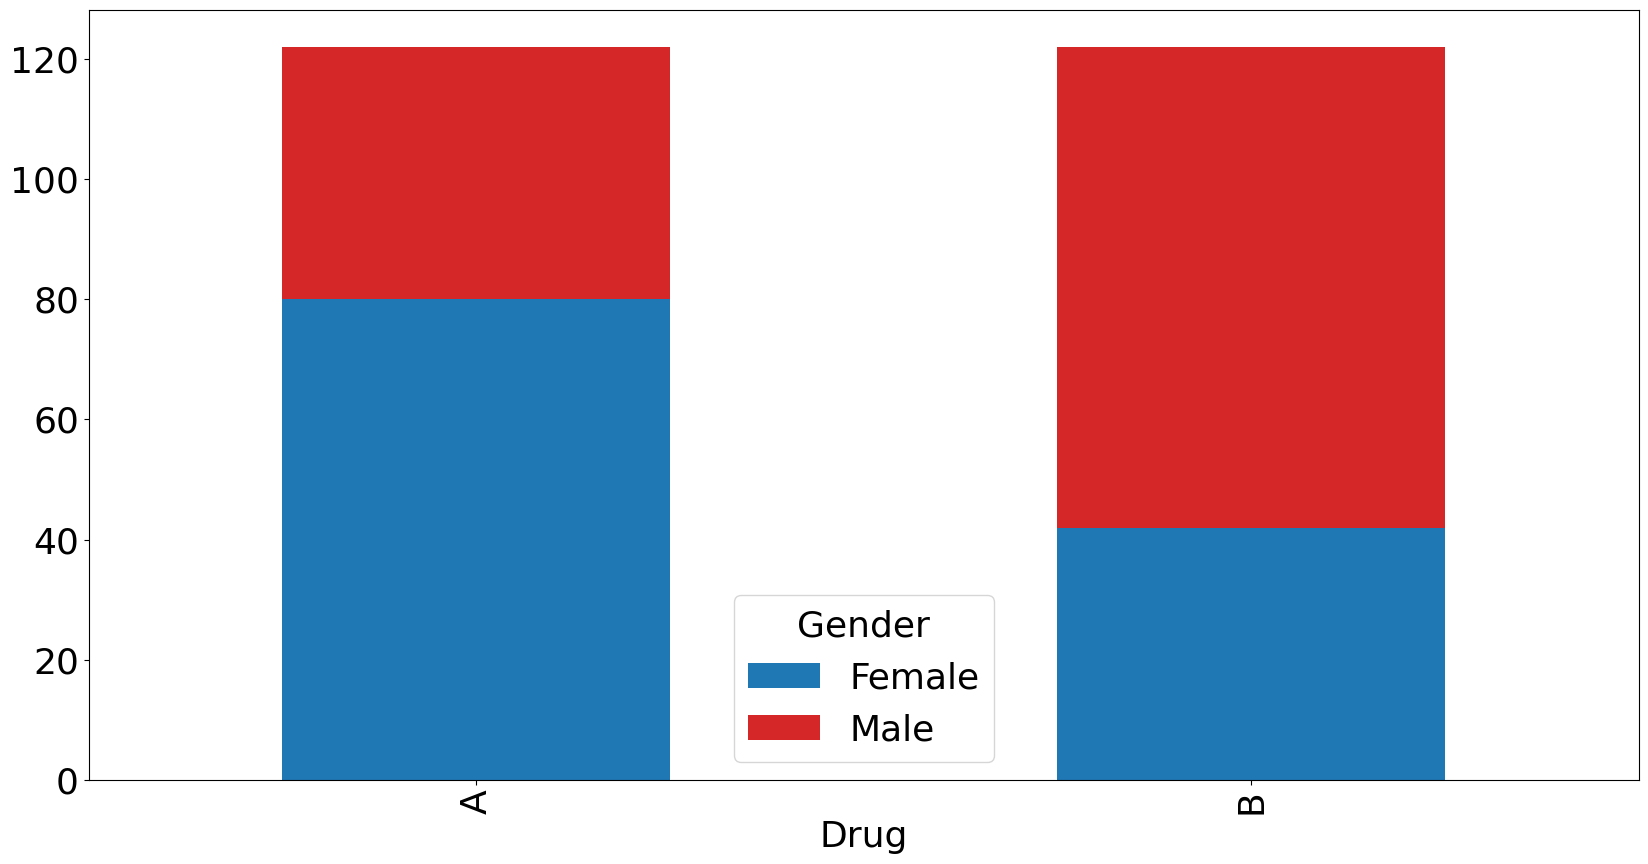

In [79]:
fig, ax = plt.subplots(figsize = (20,10))
plot_df.plot.bar(ax = ax, 
                 stacked = True, 
                 color = colors, 
                 legend = True)

In [81]:
plot_df = data.groupby(["Drug","Clot"])[["Male", "Female"]].sum().unstack().T
plot_df.index.names = ("Gender", "Clot")
plot_df = plot_df.groupby("Gender").sum().T

# Create an interactive stacked bar plot using Plotly
fig = go.Figure()

# Adding each stack (gender in this case) as a separate trace
for gender in plot_df.columns:
    fig.add_trace(go.Bar(
        x=plot_df.index,
        y=plot_df[gender],
        name=str(gender)
    ))

# Update layout for a stacked bar plot
fig.update_layout(
    barmode='stack',
    title='Gender Composition by Drug Trial',
    xaxis_title='Drug',
    yaxis_title='Total Count',
    legend_title='Gender'
)

# Show the plot
fig.show()

### Present Results for Each Trial Controlling for Gender

In [86]:
plot_df = data.groupby(["Clot", "Drug"])[["Male", "Female", "Total"]].sum().unstack().T
plot_df

Clot          0   1
Drug   Drug        
Male   A     39   3
       B     74   6
Female A     56  24
       B     25  17
Total  A     95  27
       B     99  23

In [93]:
pct_df = plot_df.copy()
for key in pct_df.keys():

    # Divide values in each row by row total; .sum(axis = 1) sums by row
    pct_df[key] = pct_df[key].div(plot_df.sum(axis = 1))

# pct_df_total = pct_df.loc[["Total"]]

pct_df.round(3)

Clot             0      1
Drug   Drug              
Male   A     0.929  0.071
       B     0.925  0.075
Female A     0.700  0.300
       B     0.595  0.405
Total  A     0.779  0.221
       B     0.811  0.189

<Axes: xlabel='Drug,Drug'>

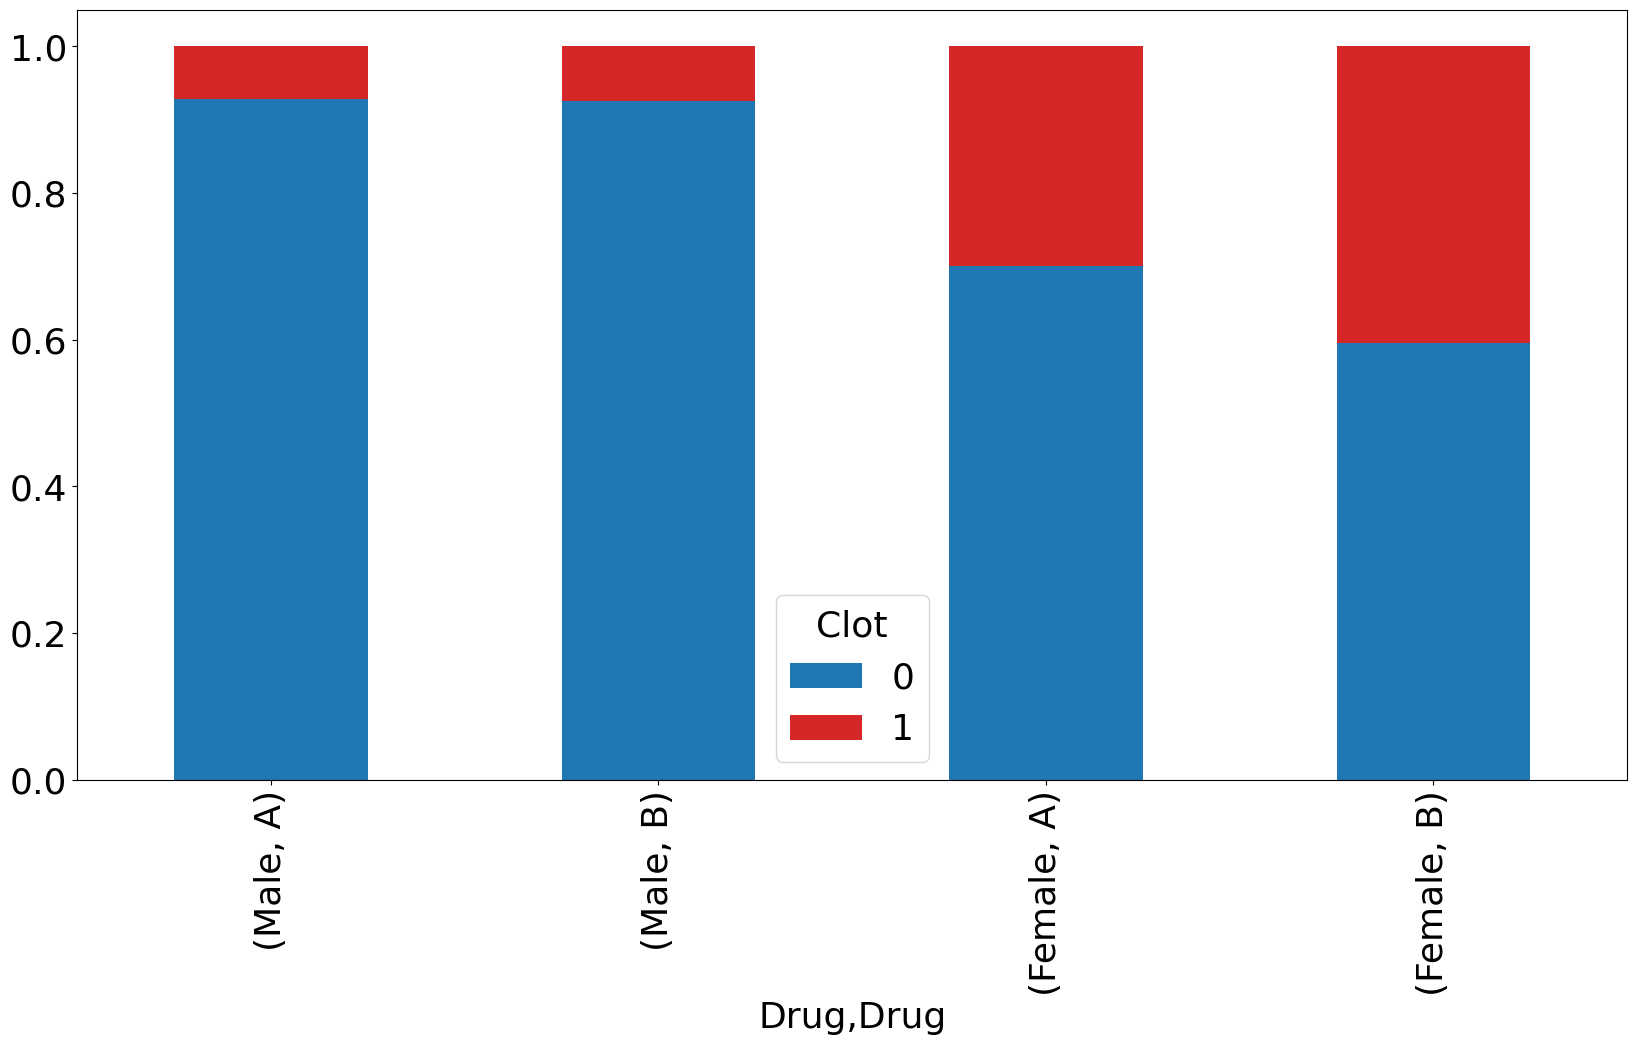

In [94]:
fig, ax = plt.subplots(figsize = (20,10))
# plot by male and female
pct_df.loc[["Male", "Female"]].plot.bar(
    ax = ax,
    # every bar separates values within row, by column
    stacked = ["Clot"],
    color = colors,
    legend = True
)

In [95]:
pct_df_gender = pct_df.loc[["Male", "Female"]].round(3)
color_map = {
    0: 'blue',  # Color for Clot 0
    1: 'red'    # Color for Clot 1
}

# Transparency (alpha) values for gender
opacity_map = {
    'Male': 1,    # Opaque for males
    'Female': 0.6  # More transparent for females
}

# Initialize an empty figure
fig = go.Figure()

# Iterate through the DataFrame and add a bar for each gender and drug combination
for (gender, drug), values in pct_df_gender.iterrows():
    for clot in range(len(values)):
        fig.add_trace(go.Bar(
            name=f"Clot {clot}",  # We will use this in the legend
            x=[f"{gender} {drug}"],
            y=[values[clot]],
            marker=dict(color=color_map[clot], opacity=opacity_map[gender]),
            legendgroup=f"Clot {clot}",
            showlegend=False  # We do not show these traces in the legend
        ))

# Add two traces for the legend
for clot in [0, 1]:
    fig.add_trace(go.Bar(
        name=f"Clot {clot}",
        x=[None],
        y=[None],
        marker=dict(color=color_map[clot], opacity=1),
        legendgroup=f"Clot: {clot}",
        showlegend=True
    ))

# Update layout for stacked bar plot
fig.update_layout(
    barmode='stack',
    title='Clots by Gender and Drug',
    xaxis=dict(title='Drug', type='category'),
    yaxis=dict(title='Percentage'),
    legend_title='Clot',
    legend=dict(
        traceorder='normal',
        orientation='h',
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Show the plot
fig.show()

